In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.regularizers import L1L2
import keras_tuner as kt
from keras import regularizers

In [2]:
df = pd.read_csv("FinalData.csv")
df

Acc_X     Acc_Y     Acc_Z  Class
0       2.660984 -9.653030  0.470237      1
1       2.223091  2.223091  2.223091      1
2       2.098372 -9.481953  0.926070      1
3       2.716461 -9.739352  0.912008      1
4       2.288388 -9.371498  0.910390      1
...          ...       ...       ...    ...
149536 -1.038340 -7.758250  0.946027     30
149537 -5.760114 -9.649714  3.393074     30
149538 -5.231769 -6.566847  5.311515     30
149539 -5.750715 -5.061987  6.386515     30
149540 -6.484581 -6.158648  4.799839     30

[149541 rows x 4 columns]

In [3]:
df.shape

(149541, 4)

In [4]:
print(sorted(Counter(df['Class']).items()))

[(1, 6348), (2, 6689), (3, 6886), (4, 6847), (5, 6680), (6, 6838), (7, 5467), (8, 5609), (9, 5938), (10, 5305), (11, 5598), (12, 5816), (13, 5927), (14, 6994), (15, 1840), (16, 6759), (17, 6944), (18, 2462), (19, 6671), (20, 6350), (21, 11699), (22, 3954), (23, 1948), (24, 1801), (25, 1890), (26, 1868), (27, 3828), (28, 3143), (29, 1143), (30, 299)]


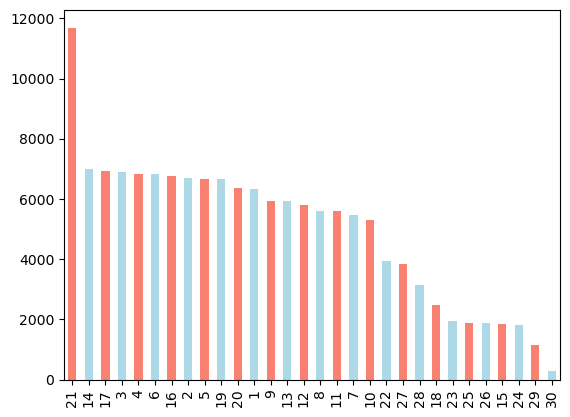

In [5]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
X = df
y = df['Class']
X.drop('Class',axis =1,inplace=True)

In [7]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state =0)
X_resampled, y_resampled = ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(1, 11699), (2, 11699), (3, 11699), (4, 11699), (5, 11699), (6, 11699), (7, 11699), (8, 11699), (9, 11699), (10, 11699), (11, 11699), (12, 11699), (13, 11699), (14, 11699), (15, 11699), (16, 11699), (17, 11699), (18, 11699), (19, 11699), (20, 11699), (21, 11699), (22, 11699), (23, 11699), (24, 11699), (25, 11699), (26, 11699), (27, 11699), (28, 11699), (29, 11699), (30, 11699)] (350970,)


In [8]:
X=X_resampled
y=y_resampled

In [9]:
df = X
df['Class'] =y

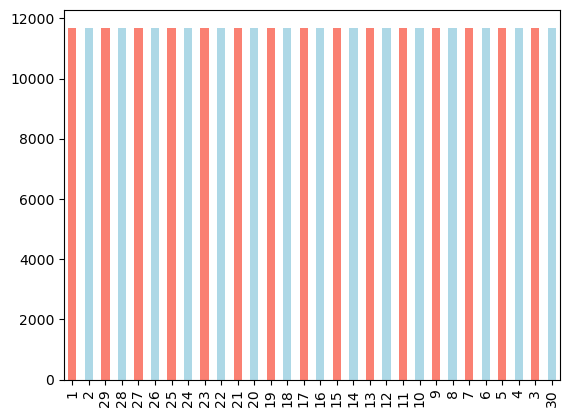

In [10]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)

print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of            Acc_X     Acc_Y     Acc_Z  Class
0       2.660984 -9.653030  0.470237      1
1       2.223091  2.223091  2.223091      1
2       2.098372 -9.481953  0.926070      1
3       2.716461 -9.739352  0.912008      1
4       2.288388 -9.371498  0.910390      1
...          ...       ...       ...    ...
350965 -0.324813 -9.329804  2.738169     30
350966 -6.484581 -6.158648  4.799839     30
350967 -2.863864 -9.089786  1.436122     30
350968 -4.680763 -8.182159  1.658256     30
350969  0.015889 -9.393323  3.129221     30

[350970 rows x 4 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
Class      int64
dtype: object
DF SHAPE:  (350970, 4)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64


In [12]:
import plotly.express as px
dfv= df[["Acc_X","Acc_Y","Acc_Z"]]
dfbv=dfv.isnull().sum()


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(dfbv,title="Checking for Null values")

fig.show()

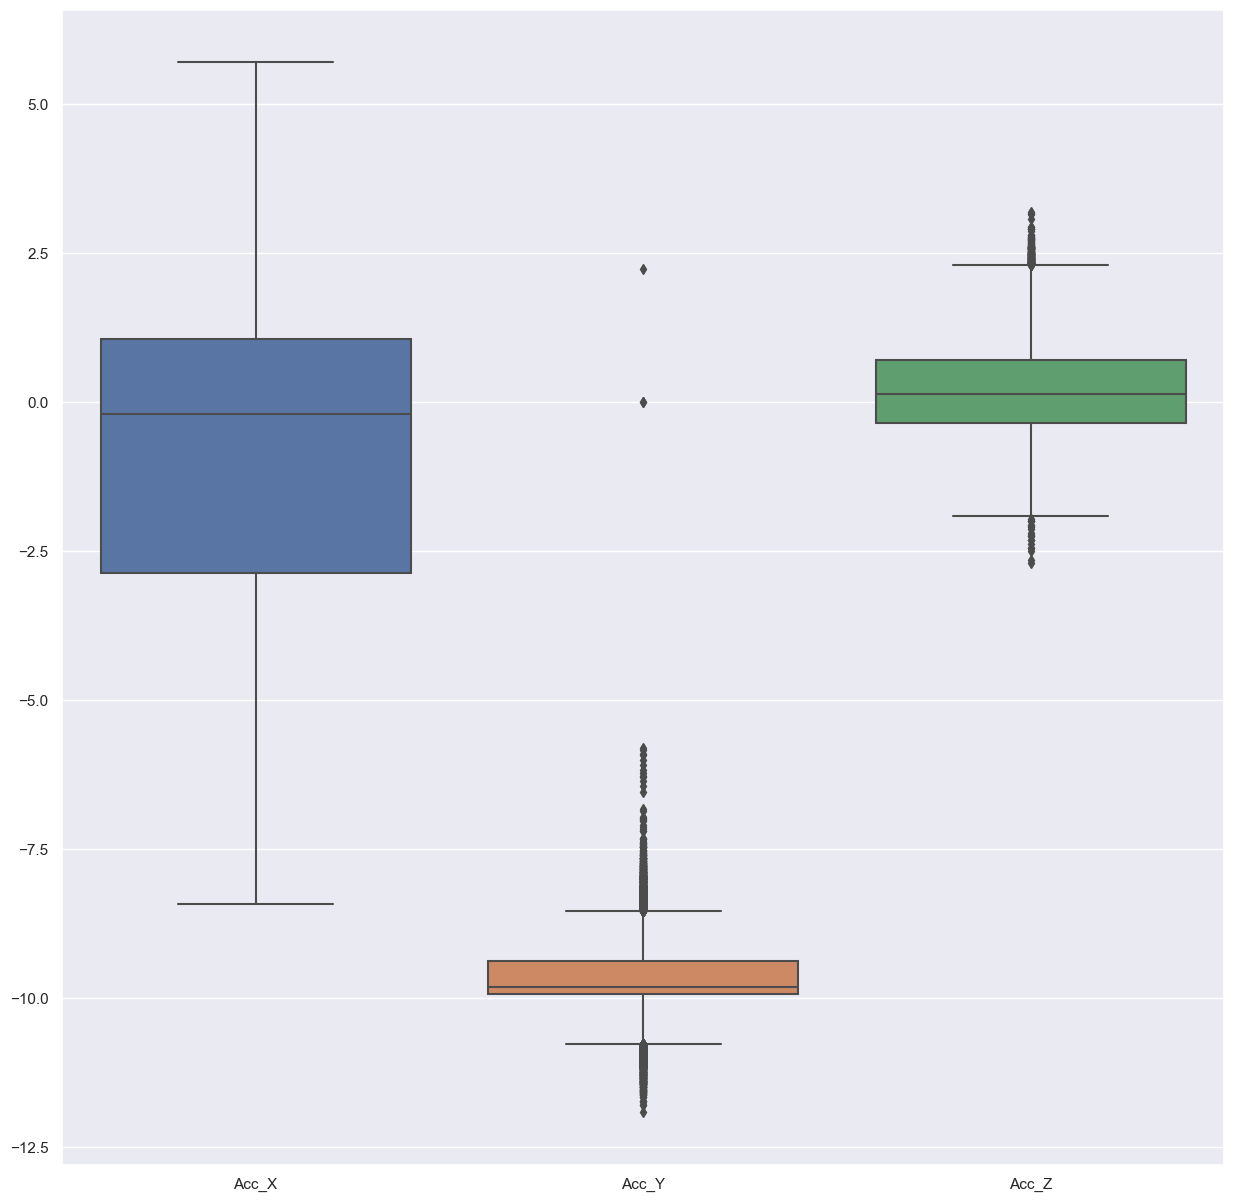

In [13]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")


In [14]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['Class']).agg(['first','last']).reset_index()
print(ind)

    Class   first    last
0       1       0  154891
1       2    6348  159901
2       3   13037  164714
3       4   19923  169566
4       5   26770  174585
5       6   33450  179446
6       7   40288  185678
7       8   45755  191768
8       9   51364  197529
9      10   57302  203923
10     11   62607  210024
11     12   68205  215907
12     13   74021  221679
13     14   79948  226384
14     15   86942  236243
15     16   88782  241183
16     17   95541  245938
17     18  102485  255175
18     19  104947  260203
19     20  111618  265552
20     21  117968  129666
21     22  129667  273297
22     23  133621  283048
23     24  135569  292946
24     25  137370  302755
25     26  139260  312586
26     27  141128  320457
27     28  144956  329013
28     29  148099  339569
29     30  149242  350969


In [15]:
for m in range(1,31):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        tenth= A.iloc[:,i].quantile(0.10)
        ninety=A.iloc[:,i].quantile(0.90)
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if(com < lim1):
                df.iloc[ami,i] = tenth
                f=f+1
            elif(com > lim2):
                df.iloc[ami,i] = ninety
                f=f+1
                
        print(f)
    if(p<29):
        p=p+1

(11699, 4)
0
154891
380
67289
(11699, 4)
6348
159901
67334
67345
(11699, 4)
13037
164714
81662
84940
(11699, 4)
19923
169566
148412
267461
(11699, 4)
26770
174585
270283
272582
(11699, 4)
33450
179446
274887
279394
(11699, 4)
40288
185678
283547
283547
(11699, 4)
45755
191768
341387
347137
(11699, 4)
51364
197529
348245
356963
(11699, 4)
57302
203923
356967
359449
(11699, 4)
62607
210024
417368
431205
(11699, 4)
68205
215907
431635
451558
(11699, 4)
74021
221679
512572
512572
(11699, 4)
79948
226384
515435
515435
(11699, 4)
86942
236243
517564
517564
(11699, 4)
88782
241183
598530
598530
(11699, 4)
95541
245938
609143
609143
(11699, 4)
102485
255175
618948
618948
(11699, 4)
104947
260203
628539
653664
(11699, 4)
111618
265552
671459
671496
(11699, 4)
117968
129666
671745
671810
(11699, 4)
129667
273297
689829
736380
(11699, 4)
133621
283048
737602
807104
(11699, 4)
135569
292946
807104
807175
(11699, 4)
137370
302755
810417
819172
(11699, 4)
139260
312586
830608
845501
(11699, 4)
14112

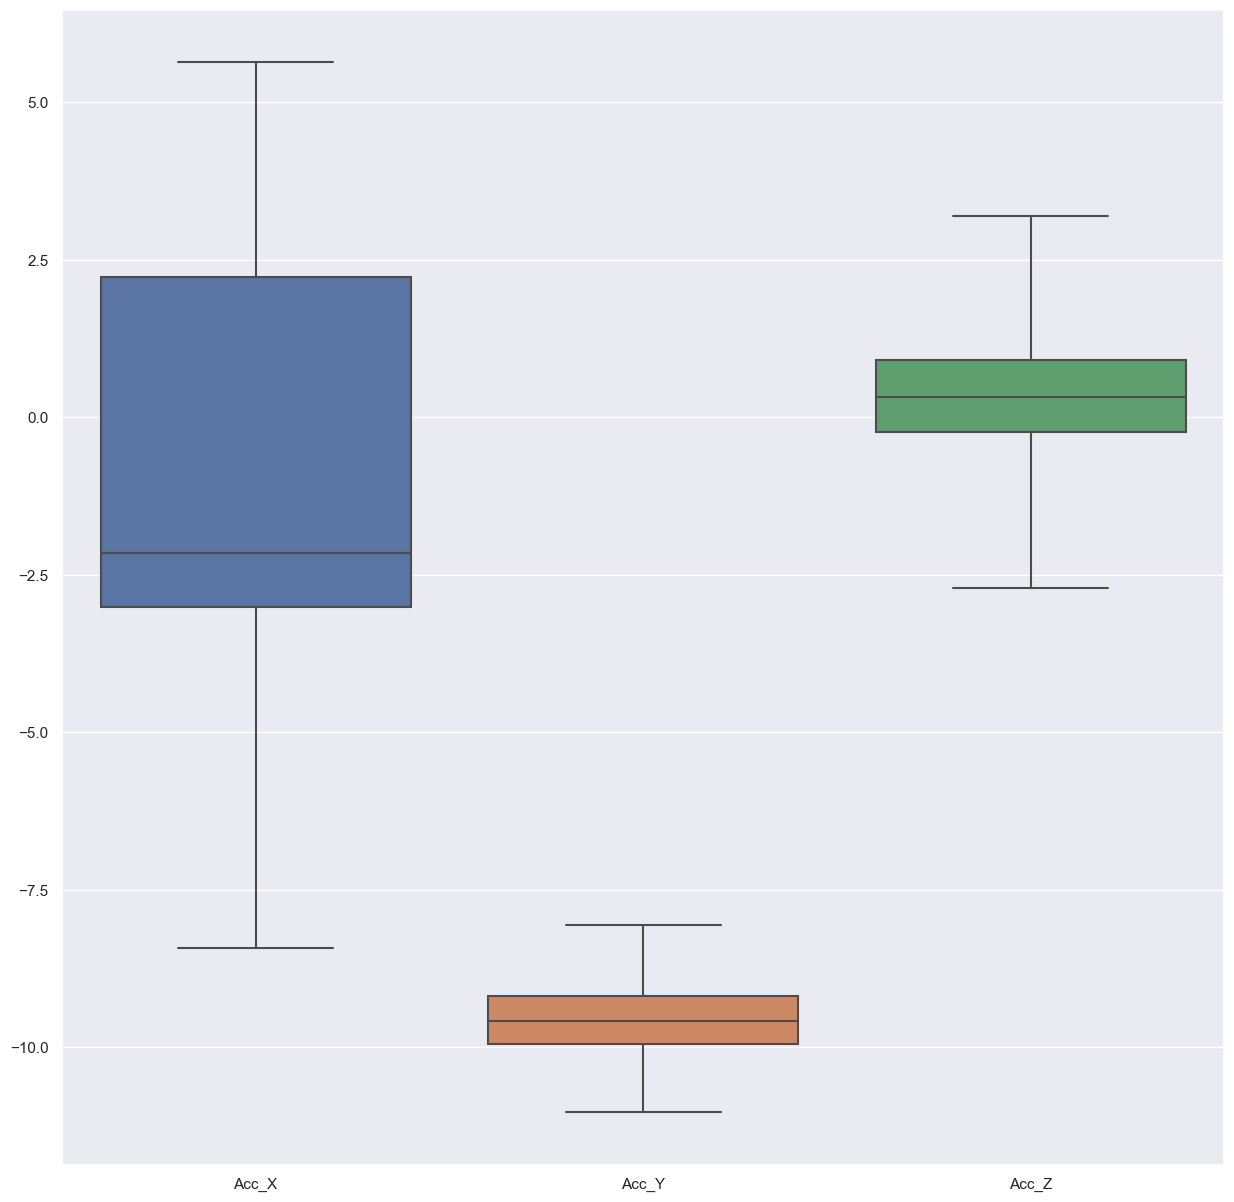

In [16]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

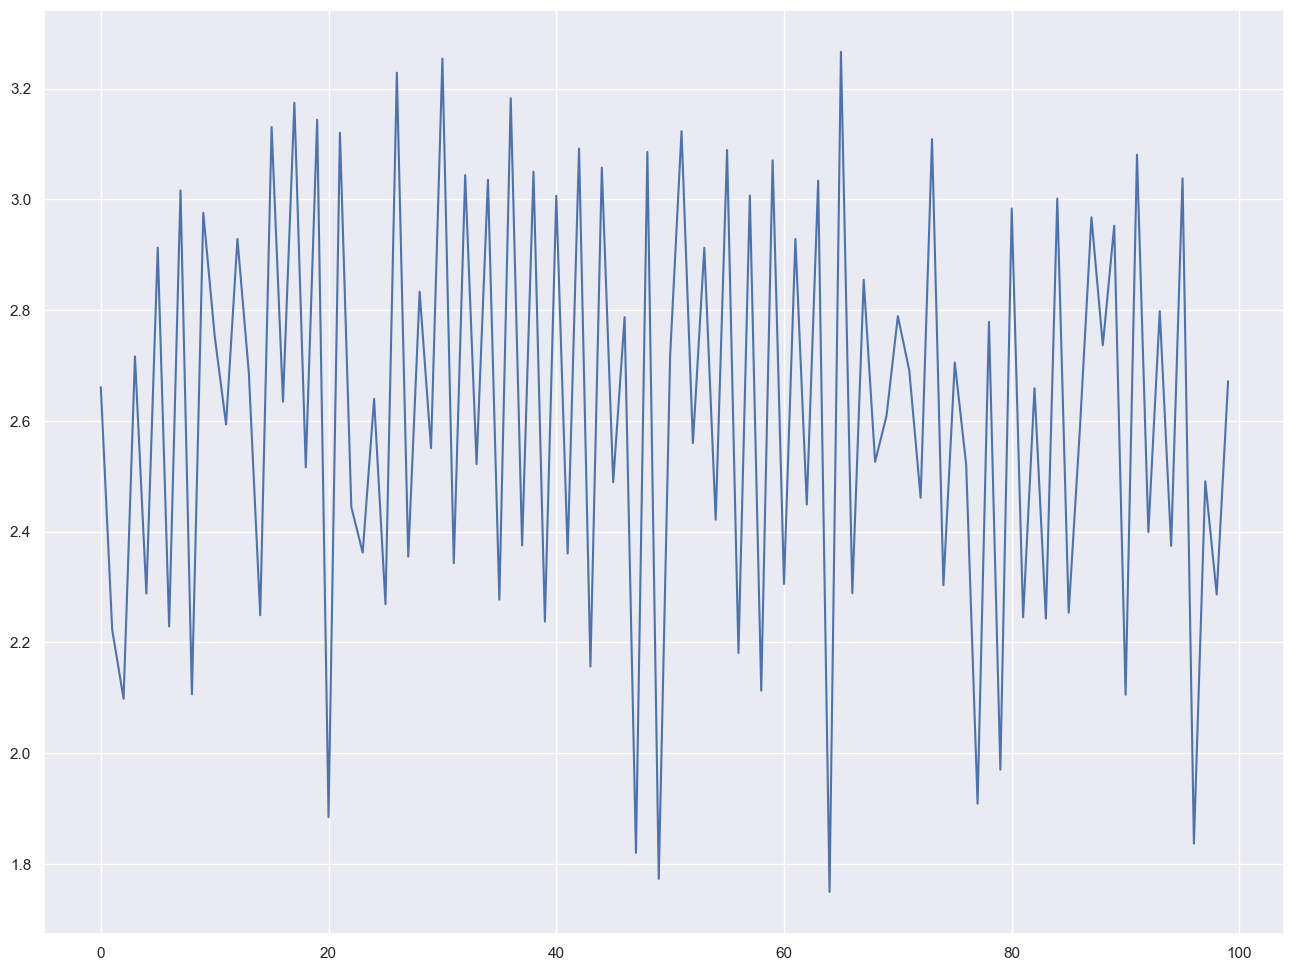

In [17]:
a = df.Acc_X
a = a[:100]
bx = a.plot(subplots=True,figsize=(16,12))

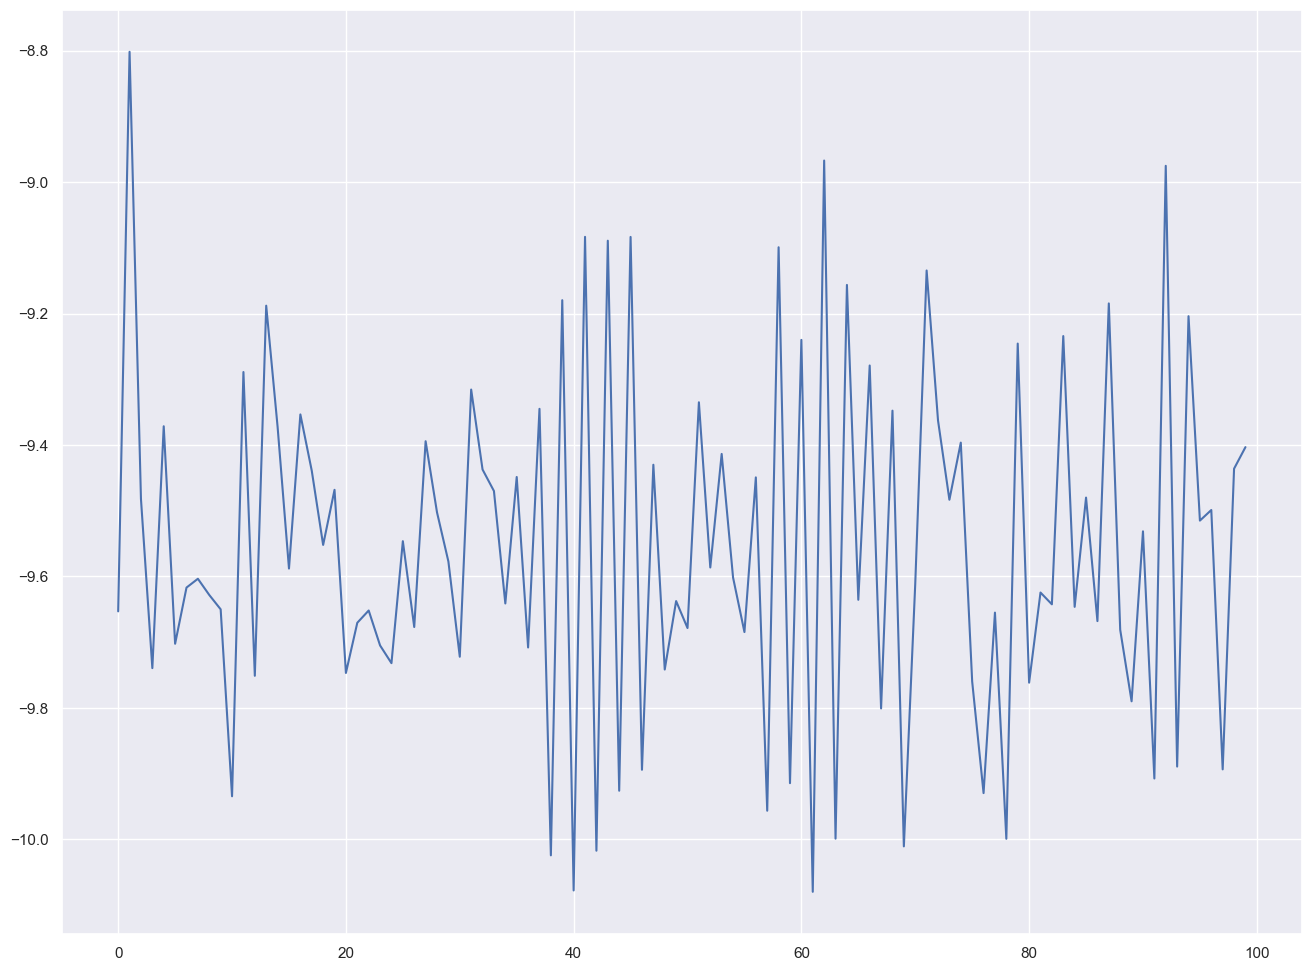

In [18]:
b = df.Acc_Y
b = b[:100]
bx = b.plot(subplots=True,figsize=(16,12))

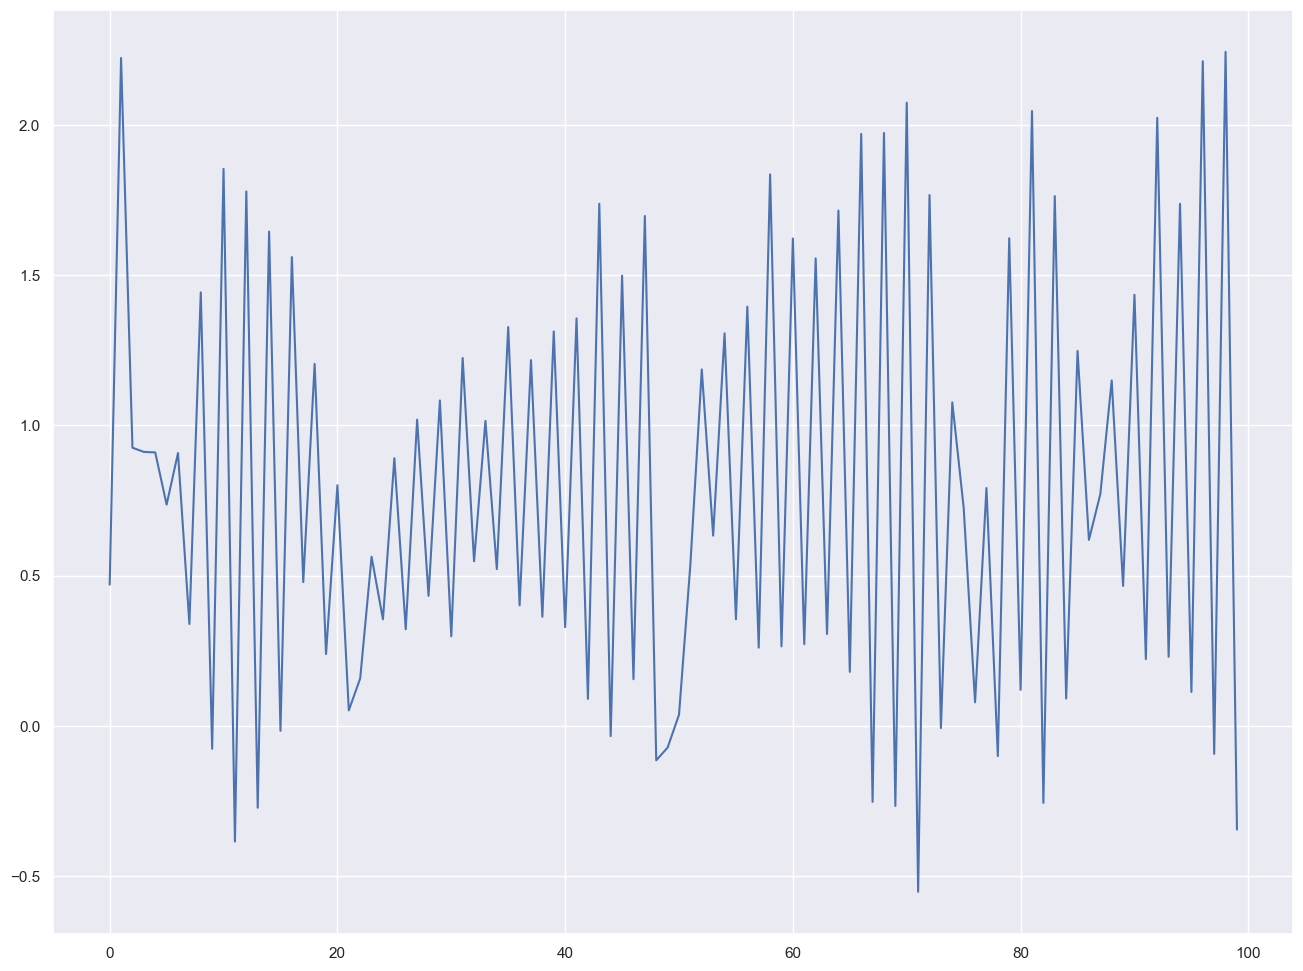

In [19]:
c = df.Acc_Z
c = c[:100]
cx = c.plot(subplots=True,figsize=(16,12))

In [20]:
#butter worth filtering
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y


p=0 

#filtering data with low pass filter
for m in range(1,31):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,3):
        df.iloc[first:last+1,i]= butter_lowpass_filter(df.iloc[first:last+1,i], 10, 100, 10)
    if(p<29):
        p = p+1

(11699, 4)
0
154891
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01

[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
(11699, 4)
144956
329013
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.4405687

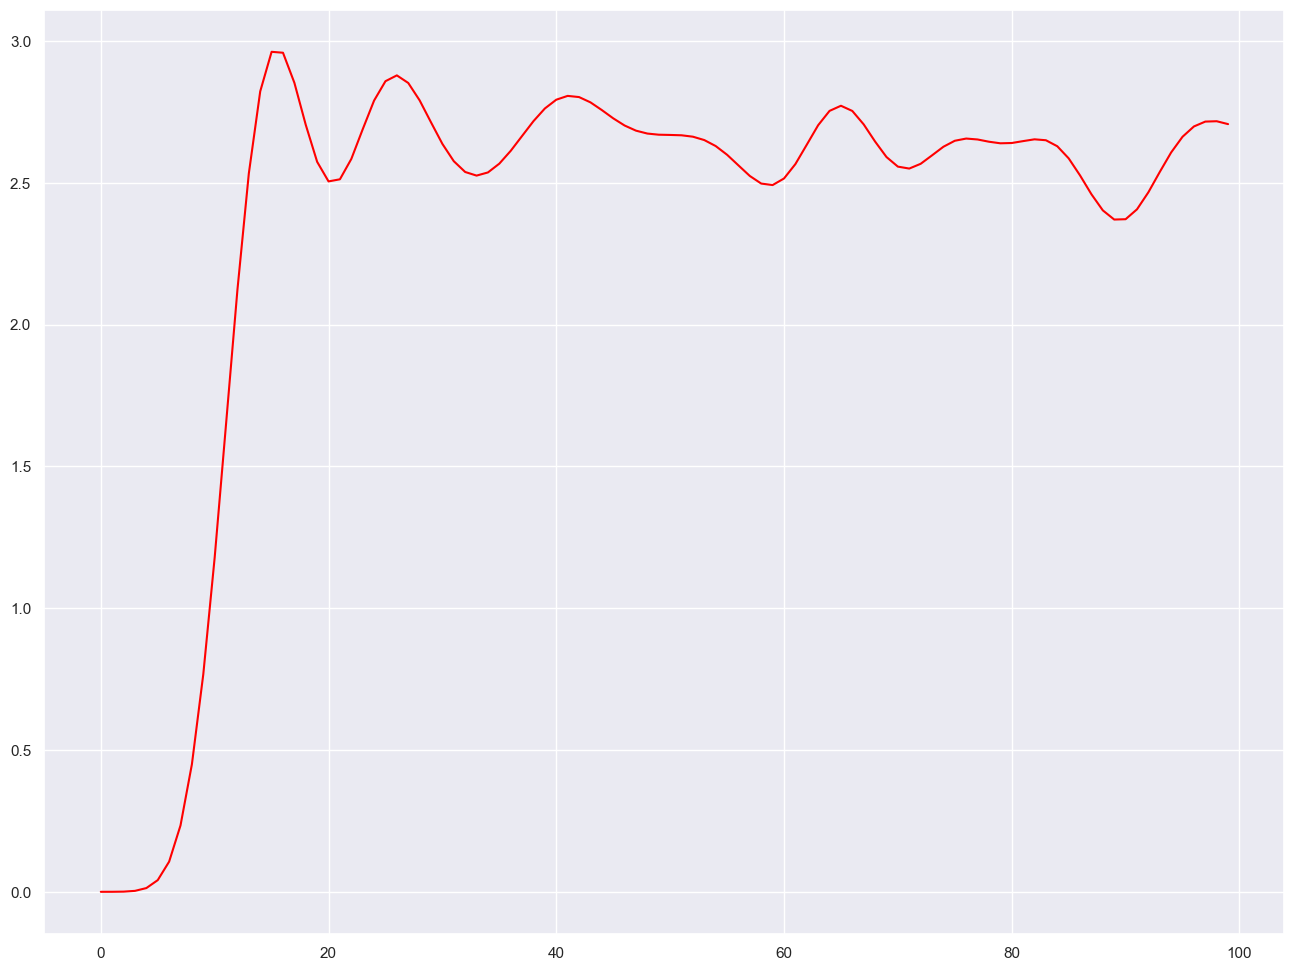

In [21]:
d = df.Acc_X
d = d[:100]
dx = d.plot(subplots=True,figsize=(16,12),color="red")

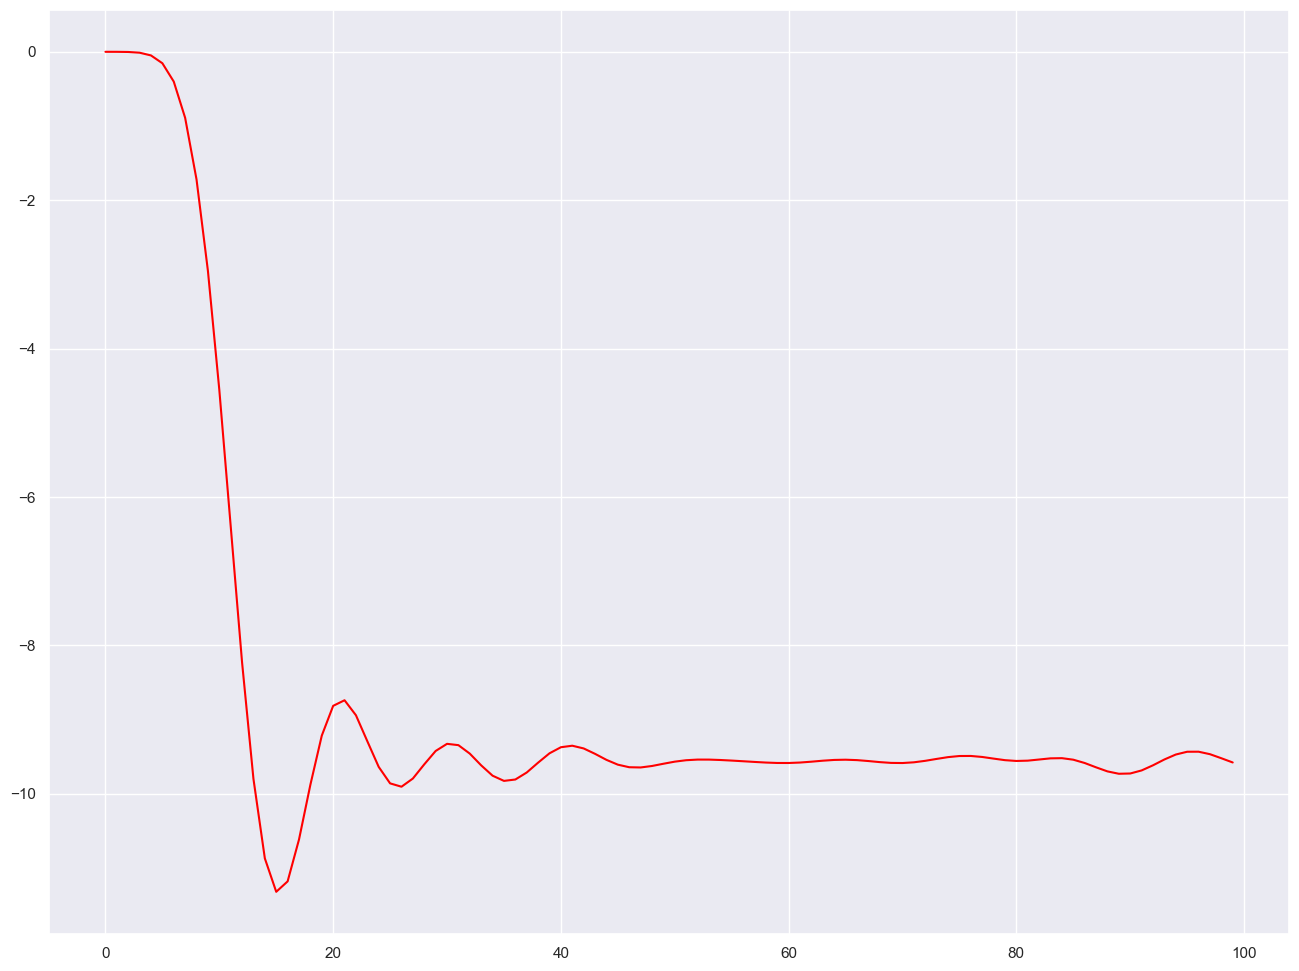

In [22]:
e = df.Acc_Y
e = e[:100]
ex = e.plot(subplots=True,figsize=(16,12),color="red")

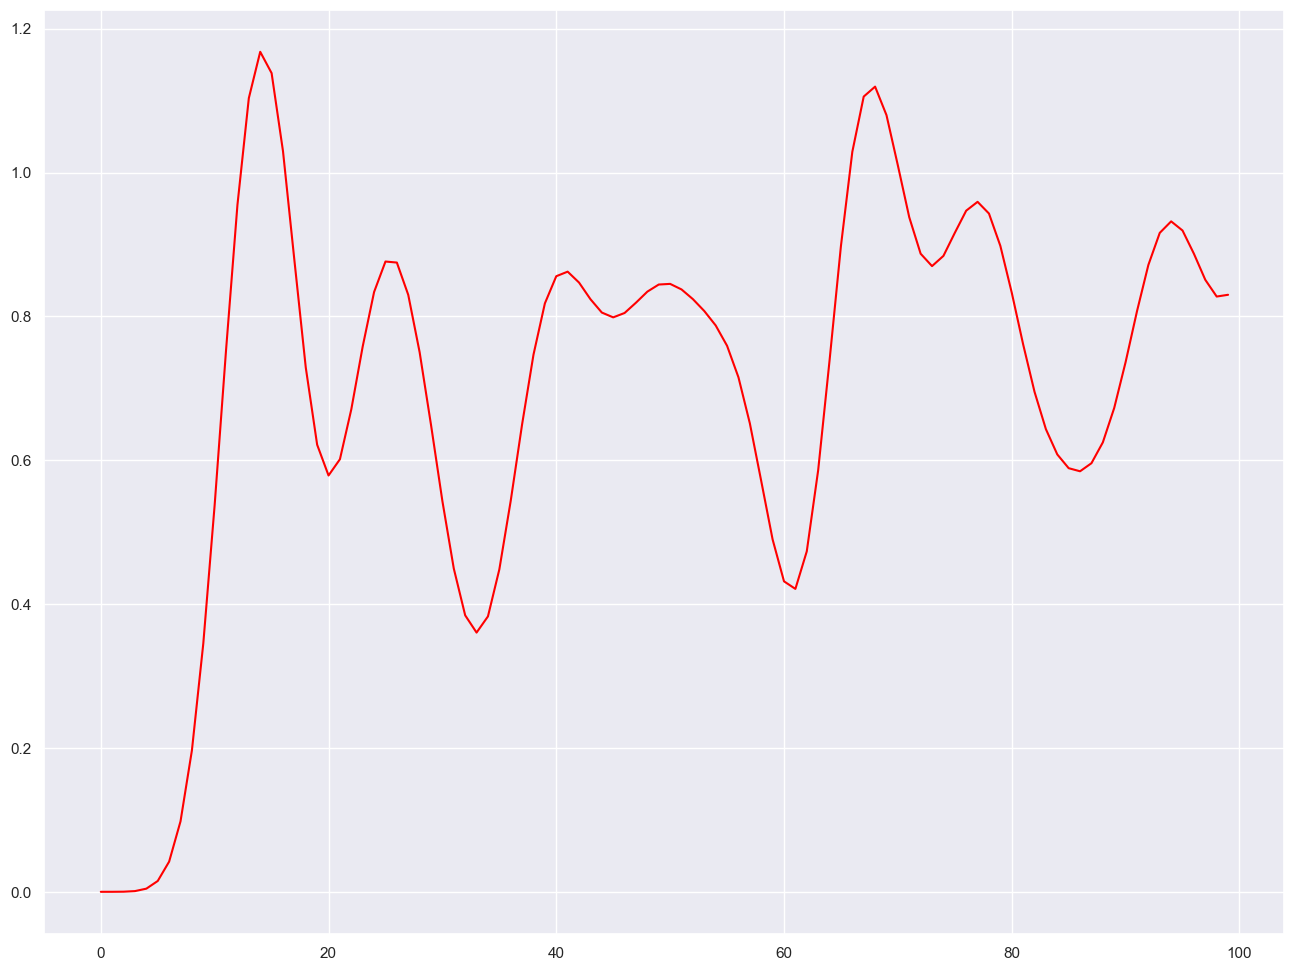

In [23]:
f = df.Acc_Z
f = f[:100]
fx = f.plot(subplots=True,figsize=(16,12),color="red")

In [24]:
#feature enginerring
df=df.eval('Mean = (Acc_X+Acc_Y+Acc_Z)/3')
df['Median']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].median(axis=1)
df['Variance']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].var(axis=1)
df['Standard_Deviation']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].std(axis=1)
df

Acc_X     Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004 -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075 -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619 -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323 -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159 -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...       ...           ...    ...       ...           ...   
350965 -2.787586 -7.921947  3.063503e+00     30 -2.548677 -2.787586e+00   
350966 -2.742421 -8.613373  2.011807e+00     30 -3.114662 -2.742421e+00   
350967 -2.714383 -9.054635  1.288260e+00     30 -3.493586 -2.714383e+00   
350968 -2.666868 -9.156679  1.081825e+00     30 -3.580574 -2.666868e+00   
350969 -2.560514 -8.929967  1.422862e+00     30 -3.355873 -2.560514e+00   

            Variance  Standard_Deviation  
0       1.223134e-10            0.000011  
1       3.511515e-08            0.000187  
2       2.408401e-06            0.001552  
3       7.061404e-05            0.008403  
4       1.127895e-03            0.033584  
...              ...                 ...  
350965  3.021284e+01            5.496621  
350966  2.832754e+01            5.322362  
350967  2.719924e+01            5.215289  
350968  2.683289e+01            5.180047  
350969  2.726972e+01            5.222041  

[350970 rows x 8 columns]

In [25]:
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

q3=[]
q1=[]
for x in sort:

    q3x,q1x= np.percentile(x,[75,25])
    q3.append(q3x)
    q1.append(q1x)
df['Q3']=q3
df['Q1']=q1
df

Acc_X     Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004 -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075 -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619 -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323 -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159 -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...       ...           ...    ...       ...           ...   
350965 -2.787586 -7.921947  3.063503e+00     30 -2.548677 -2.787586e+00   
350966 -2.742421 -8.613373  2.011807e+00     30 -3.114662 -2.742421e+00   
350967 -2.714383 -9.054635  1.288260e+00     30 -3.493586 -2.714383e+00   
350968 -2.666868 -9.156679  1.081825e+00     30 -3.580574 -2.666868e+00   
350969 -2.560514 -8.929967  1.422862e+00     30 -3.355873 -2.560514e+00   

            Variance  Standard_Deviation        Q3        Q1  
0       1.223134e-10            0.000011  0.000003 -0.000008  
1       3.511515e-08            0.000187  0.000046 -0.000129  
2       2.408401e-06            0.001552  0.000389 -0.001055  
3       7.061404e-05            0.008403  0.002154 -0.005637  
4       1.127895e-03            0.033584  0.008769 -0.022262  
...              ...                 ...       ...       ...  
350965  3.021284e+01            5.496621  0.137959 -5.354767  
350966  2.832754e+01            5.322362 -0.365307 -5.677897  
350967  2.719924e+01            5.215289 -0.713062 -5.884509  
350968  2.683289e+01            5.180047 -0.792521 -5.911773  
350969  2.726972e+01            5.222041 -0.568826 -5.745241  

[350970 rows x 10 columns]

In [26]:
def getZCR(arr):
        my_array = np.array(arr)
        return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))
zcr=[]
arr2=np.array(df.loc[:,['Acc_X','Acc_Y','Acc_Z']])


for x in arr2:
    zcr.append(getZCR(x))
df['ZCR']=zcr
df

Acc_X     Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004 -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075 -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619 -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323 -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159 -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...       ...           ...    ...       ...           ...   
350965 -2.787586 -7.921947  3.063503e+00     30 -2.548677 -2.787586e+00   
350966 -2.742421 -8.613373  2.011807e+00     30 -3.114662 -2.742421e+00   
350967 -2.714383 -9.054635  1.288260e+00     30 -3.493586 -2.714383e+00   
350968 -2.666868 -9.156679  1.081825e+00     30 -3.580574 -2.666868e+00   
350969 -2.560514 -8.929967  1.422862e+00     30 -3.355873 -2.560514e+00   

            Variance  Standard_Deviation        Q3        Q1   ZCR  
0       1.223134e-10            0.000011  0.000003 -0.000008  0.67  
1       3.511515e-08            0.000187  0.000046 -0.000129  0.67  
2       2.408401e-06            0.001552  0.000389 -0.001055  0.67  
3       7.061404e-05            0.008403  0.002154 -0.005637  0.67  
4       1.127895e-03            0.033584  0.008769 -0.022262  0.67  
...              ...                 ...       ...       ...   ...  
350965  3.021284e+01            5.496621  0.137959 -5.354767  0.33  
350966  2.832754e+01            5.322362 -0.365307 -5.677897  0.33  
350967  2.719924e+01            5.215289 -0.713062 -5.884509  0.33  
350968  2.683289e+01            5.180047 -0.792521 -5.911773  0.33  
350969  2.726972e+01            5.222041 -0.568826 -5.745241  0.33  

[350970 rows x 11 columns]

In [27]:
def getMCR(arr):
    return getZCR(np.array(arr) - np.mean(arr))

MCR=[]
arr2=np.array(df.loc[:,['Acc_X','Acc_Y','Acc_Z']])

for x in arr2:
        MCR.append(getMCR(x))

df['MCR']=MCR
df

Acc_X     Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004 -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075 -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619 -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323 -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159 -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...       ...           ...    ...       ...           ...   
350965 -2.787586 -7.921947  3.063503e+00     30 -2.548677 -2.787586e+00   
350966 -2.742421 -8.613373  2.011807e+00     30 -3.114662 -2.742421e+00   
350967 -2.714383 -9.054635  1.288260e+00     30 -3.493586 -2.714383e+00   
350968 -2.666868 -9.156679  1.081825e+00     30 -3.580574 -2.666868e+00   
350969 -2.560514 -8.929967  1.422862e+00     30 -3.355873 -2.560514e+00   

            Variance  Standard_Deviation        Q3        Q1   ZCR   MCR  
0       1.223134e-10            0.000011  0.000003 -0.000008  0.67  0.67  
1       3.511515e-08            0.000187  0.000046 -0.000129  0.67  0.67  
2       2.408401e-06            0.001552  0.000389 -0.001055  0.67  0.67  
3       7.061404e-05            0.008403  0.002154 -0.005637  0.67  0.67  
4       1.127895e-03            0.033584  0.008769 -0.022262  0.67  0.67  
...              ...                 ...       ...       ...   ...   ...  
350965  3.021284e+01            5.496621  0.137959 -5.354767  0.33  0.33  
350966  2.832754e+01            5.322362 -0.365307 -5.677897  0.33  0.67  
350967  2.719924e+01            5.215289 -0.713062 -5.884509  0.33  0.67  
350968  2.683289e+01            5.180047 -0.792521 -5.911773  0.33  0.67  
350969  2.726972e+01            5.222041 -0.568826 -5.745241  0.33  0.67  

[350970 rows x 12 columns]

In [28]:
from math import e
def entropy4(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

y=[]
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

for x in sort:
    y.append(entropy4(x))
df['Entropy']=y
df

Acc_X     Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004 -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075 -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619 -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323 -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159 -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...       ...           ...    ...       ...           ...   
350965 -2.787586 -7.921947  3.063503e+00     30 -2.548677 -2.787586e+00   
350966 -2.742421 -8.613373  2.011807e+00     30 -3.114662 -2.742421e+00   
350967 -2.714383 -9.054635  1.288260e+00     30 -3.493586 -2.714383e+00   
350968 -2.666868 -9.156679  1.081825e+00     30 -3.580574 -2.666868e+00   
350969 -2.560514 -8.929967  1.422862e+00     30 -3.355873 -2.560514e+00   

            Variance  Standard_Deviation        Q3        Q1   ZCR   MCR  \
0       1.223134e-10            0.000011  0.000003 -0.000008  0.67  0.67   
1       3.511515e-08            0.000187  0.000046 -0.000129  0.67  0.67   
2       2.408401e-06            0.001552  0.000389 -0.001055  0.67  0.67   
3       7.061404e-05            0.008403  0.002154 -0.005637  0.67  0.67   
4       1.127895e-03            0.033584  0.008769 -0.022262  0.67  0.67   
...              ...                 ...       ...       ...   ...   ...   
350965  3.021284e+01            5.496621  0.137959 -5.354767  0.33  0.33   
350966  2.832754e+01            5.322362 -0.365307 -5.677897  0.33  0.67   
350967  2.719924e+01            5.215289 -0.713062 -5.884509  0.33  0.67   
350968  2.683289e+01            5.180047 -0.792521 -5.911773  0.33  0.67   
350969  2.726972e+01            5.222041 -0.568826 -5.745241  0.33  0.67   

         Entropy  
0       1.098612  
1       1.098612  
2       1.098612  
3       1.098612  
4       1.098612  
...          ...  
350965  1.098612  
350966  1.098612  
350967  1.098612  
350968  1.098612  
350969  1.098612  

[350970 rows x 13 columns]

In [29]:
for index, row in df.iterrows():
     rms=np.sqrt(((df['Acc_X'] ** 2) + (df['Acc_Y'] ** 2) +(df['Acc_Z'] ** 2))/3)
df['RMS']=rms
df

Acc_X     Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004 -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075 -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619 -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323 -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159 -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...       ...           ...    ...       ...           ...   
350965 -2.787586 -7.921947  3.063503e+00     30 -2.548677 -2.787586e+00   
350966 -2.742421 -8.613373  2.011807e+00     30 -3.114662 -2.742421e+00   
350967 -2.714383 -9.054635  1.288260e+00     30 -3.493586 -2.714383e+00   
350968 -2.666868 -9.156679  1.081825e+00     30 -3.580574 -2.666868e+00   
350969 -2.560514 -8.929967  1.422862e+00     30 -3.355873 -2.560514e+00   

            Variance  Standard_Deviation        Q3        Q1   ZCR   MCR  \
0       1.223134e-10            0.000011  0.000003 -0.000008  0.67  0.67   
1       3.511515e-08            0.000187  0.000046 -0.000129  0.67  0.67   
2       2.408401e-06            0.001552  0.000389 -0.001055  0.67  0.67   
3       7.061404e-05            0.008403  0.002154 -0.005637  0.67  0.67   
4       1.127895e-03            0.033584  0.008769 -0.022262  0.67  0.67   
...              ...                 ...       ...       ...   ...   ...   
350965  3.021284e+01            5.496621  0.137959 -5.354767  0.33  0.33   
350966  2.832754e+01            5.322362 -0.365307 -5.677897  0.33  0.67   
350967  2.719924e+01            5.215289 -0.713062 -5.884509  0.33  0.67   
350968  2.683289e+01            5.180047 -0.792521 -5.911773  0.33  0.67   
350969  2.726972e+01            5.222041 -0.568826 -5.745241  0.33  0.67   

         Entropy       RMS  
0       1.098612  0.000010  
1       1.098612  0.000165  
2       1.098612  0.001361  
3       1.098612  0.007355  
4       1.098612  0.029347  
...          ...       ...  
350965  1.098612  5.161167  
350966  1.098612  5.346601  
350967  1.098612  5.507991  
350968  1.098612  5.541579  
350969  1.098612  5.426020  

[350970 rows x 14 columns]

In [30]:
C=df

In [31]:
#separating target column
X = C.drop('Class', axis=1)  
y = C['Class']

Feature: 0, Score: 0.14923
Feature: 1, Score: 0.09343
Feature: 2, Score: 0.04203
Feature: 3, Score: 0.07647
Feature: 4, Score: 0.07658
Feature: 5, Score: 0.04629
Feature: 6, Score: 0.02003
Feature: 7, Score: 0.10316
Feature: 8, Score: 0.02120
Feature: 9, Score: 0.11039
Feature: 10, Score: 0.02165
Feature: 11, Score: 0.17477
Feature: 12, Score: 0.06477


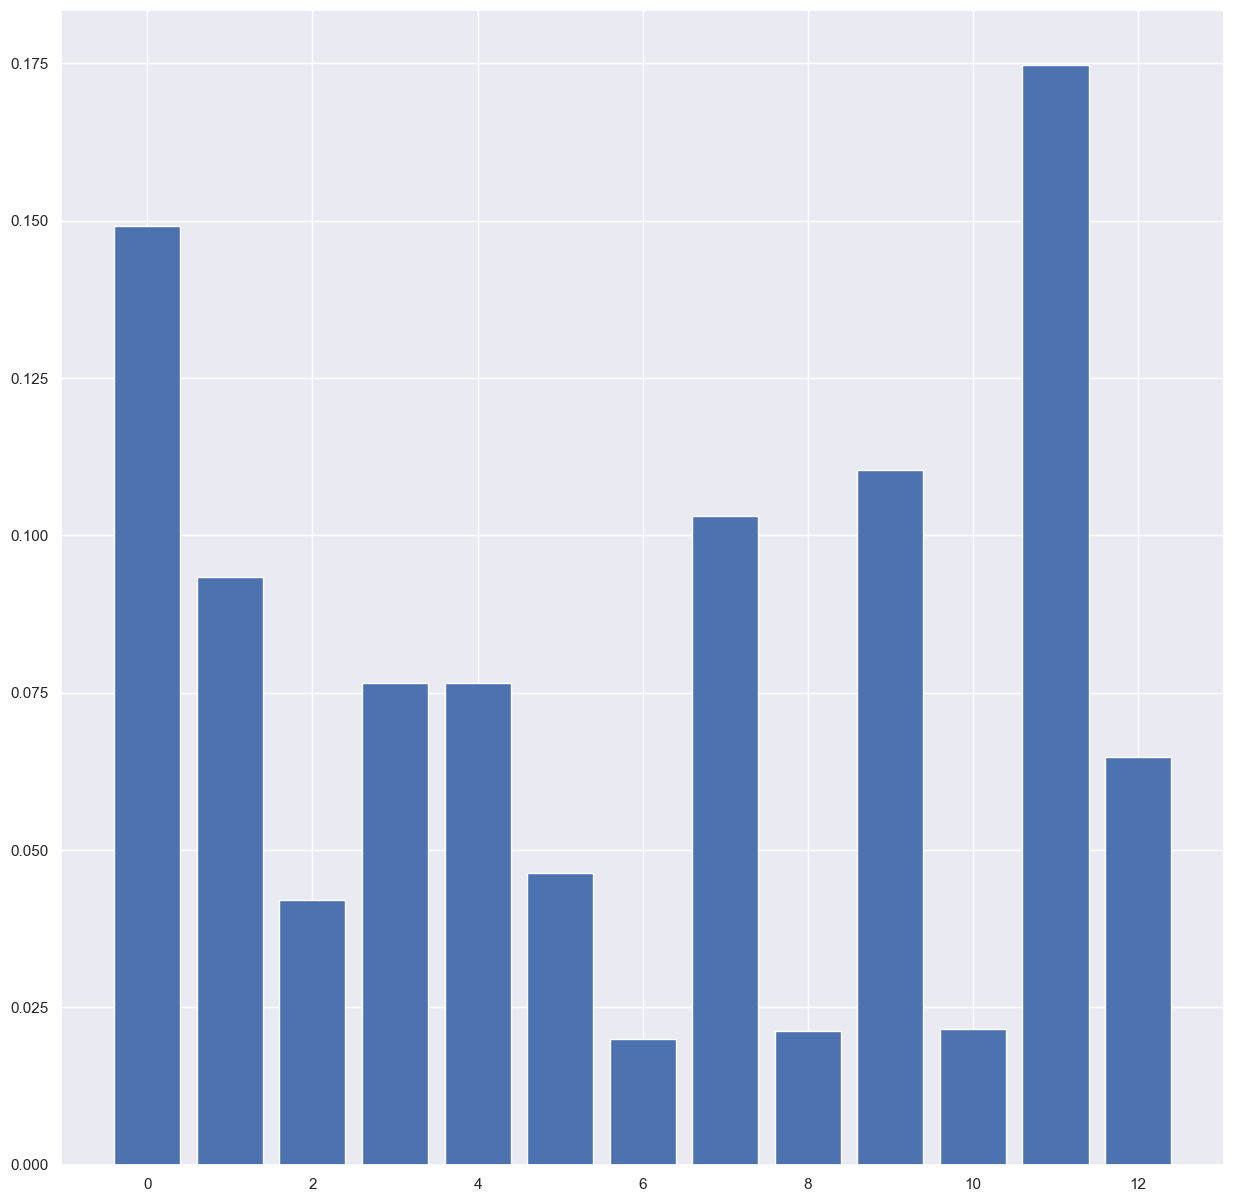

In [32]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [33]:
#taking filtered data into new dataframe
B=df

In [34]:
#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [35]:
N_TIME_STEPS = 10
N_FEATURES = 13
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    mean = B['Mean'].values[i: i + N_TIME_STEPS]
    median = B['Median'].values[i: i + N_TIME_STEPS]
    variance = B['Variance'].values[i: i + N_TIME_STEPS]
    SD = B['Standard_Deviation'].values[i: i + N_TIME_STEPS]
    rms = B['RMS'].values[i: i + N_TIME_STEPS]
    q3 = B['Q3'].values[i: i + N_TIME_STEPS]
    q1 = B['Q1'].values[i: i + N_TIME_STEPS]
    Zcr = B['ZCR'].values[i: i + N_TIME_STEPS]
    mcr = B['MCR'].values[i: i + N_TIME_STEPS]
    entrophy = B['Entropy'].values[i: i + N_TIME_STEPS]


    label = stats.mode(B['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs,mean,median,variance,SD,rms,q3,q1,Zcr,mcr,entrophy]) 
    labels.append(label)
    

print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)

C:\Users\iktear\AppData\Local\Temp\ipykernel_4968\2052382913.py:24: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



SEGMENTS SHAPE:  (350960, 13, 10)
LABELS SHAPE:  (350960,)


In [36]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int64)

print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels[0])

RESHAPE SHAPE:  (350960, 10, 13)
LABELS:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (350960, 10, 13)
LABELS:  (350960, 30)


In [38]:
random_seed = 42   
# n_time_steps = 1 
# n_features = 4 
# step = 1
# n_classes = 20 
# n_epochs = 50       
# batch_size = 1024   
# learning_rate = 0.0025
# l2_loss = 0.0015
X_train, X_val, y_train, y_val = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed,stratify = labels)

In [39]:
# X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.20) 
# Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (224614, 10, 13)
X_test shape: (56154, 10, 13)
y_train shape: (224614, 30)
y_test shape: (56154, 30)
X_val shape: (70192, 10, 13)
y val shape: (70192, 30)


In [40]:
from keras import optimizers
# Initialising the LSTM
classifier = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 416, return_sequences = True, activation='tanh'))
classifier.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 576, return_sequences = True, activation='tanh'))
classifier.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 992, return_sequences = True, activation='tanh'))
classifier.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
# classifier.add(LSTM(units = 512, activation='tanh'))
classifier.add(Flatten())
# Adding the output layer
classifier.add(Dense(units = 928, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 896, activation='tanh'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 30, activation='softmax'))
# Compiling the LSTM
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val), batch_size = 256, verbose = 1)

Epoch 1/100
878/878 [==============================] - 773s 874ms/step - loss: 1.5271 - accuracy: 0.4824 - val_loss: 1.2153 - val_accuracy: 0.5853
Epoch 2/100
878/878 [==============================] - 764s 870ms/step - loss: 1.0530 - accuracy: 0.6294 - val_loss: 0.9560 - val_accuracy: 0.6539
Epoch 3/100
878/878 [==============================] - 761s 867ms/step - loss: 0.9175 - accuracy: 0.6732 - val_loss: 0.7924 - val_accuracy: 0.7155
Epoch 4/100
878/878 [==============================] - 763s 869ms/step - loss: 0.8682 - accuracy: 0.6899 - val_loss: 0.8112 - val_accuracy: 0.7045
Epoch 5/100
878/878 [==============================] - 764s 870ms/step - loss: 0.8233 - accuracy: 0.7058 - val_loss: 0.6984 - val_accuracy: 0.7467
Epoch 6/100
878/878 [==============================] - 762s 868ms/step - loss: 0.7967 - accuracy: 0.7148 - val_loss: 0.7113 - val_accuracy: 0.7398
Epoch 7/100
878/878 [==============================] - 761s 867ms/step - loss: 0.7725 - accuracy: 0.7232 - val_loss: 0

878/878 [==============================] - 785s 894ms/step - loss: 0.3161 - accuracy: 0.8814 - val_loss: 0.3313 - val_accuracy: 0.8826
Epoch 57/100
878/878 [==============================] - 785s 894ms/step - loss: 0.3146 - accuracy: 0.8822 - val_loss: 0.3480 - val_accuracy: 0.8763
Epoch 58/100
878/878 [==============================] - 785s 894ms/step - loss: 0.3091 - accuracy: 0.8845 - val_loss: 0.3636 - val_accuracy: 0.8694
Epoch 59/100
878/878 [==============================] - 786s 896ms/step - loss: 0.3048 - accuracy: 0.8869 - val_loss: 0.3949 - val_accuracy: 0.8571
Epoch 60/100
878/878 [==============================] - 789s 899ms/step - loss: 0.2973 - accuracy: 0.8894 - val_loss: 0.3315 - val_accuracy: 0.8836
Epoch 61/100
878/878 [==============================] - 790s 900ms/step - loss: 0.2920 - accuracy: 0.8913 - val_loss: 0.3196 - val_accuracy: 0.8886
Epoch 62/100
878/878 [==============================] - 791s 901ms/step - loss: 0.2893 - accuracy: 0.8916 - val_loss: 0.3197 

In [42]:
classifier.evaluate(X_test,y_test, batch_size = 256)

220/220 [==============================] - 61s 276ms/step - loss: 0.2838 - accuracy: 0.9156


[0.28380897641181946, 0.9155892729759216]

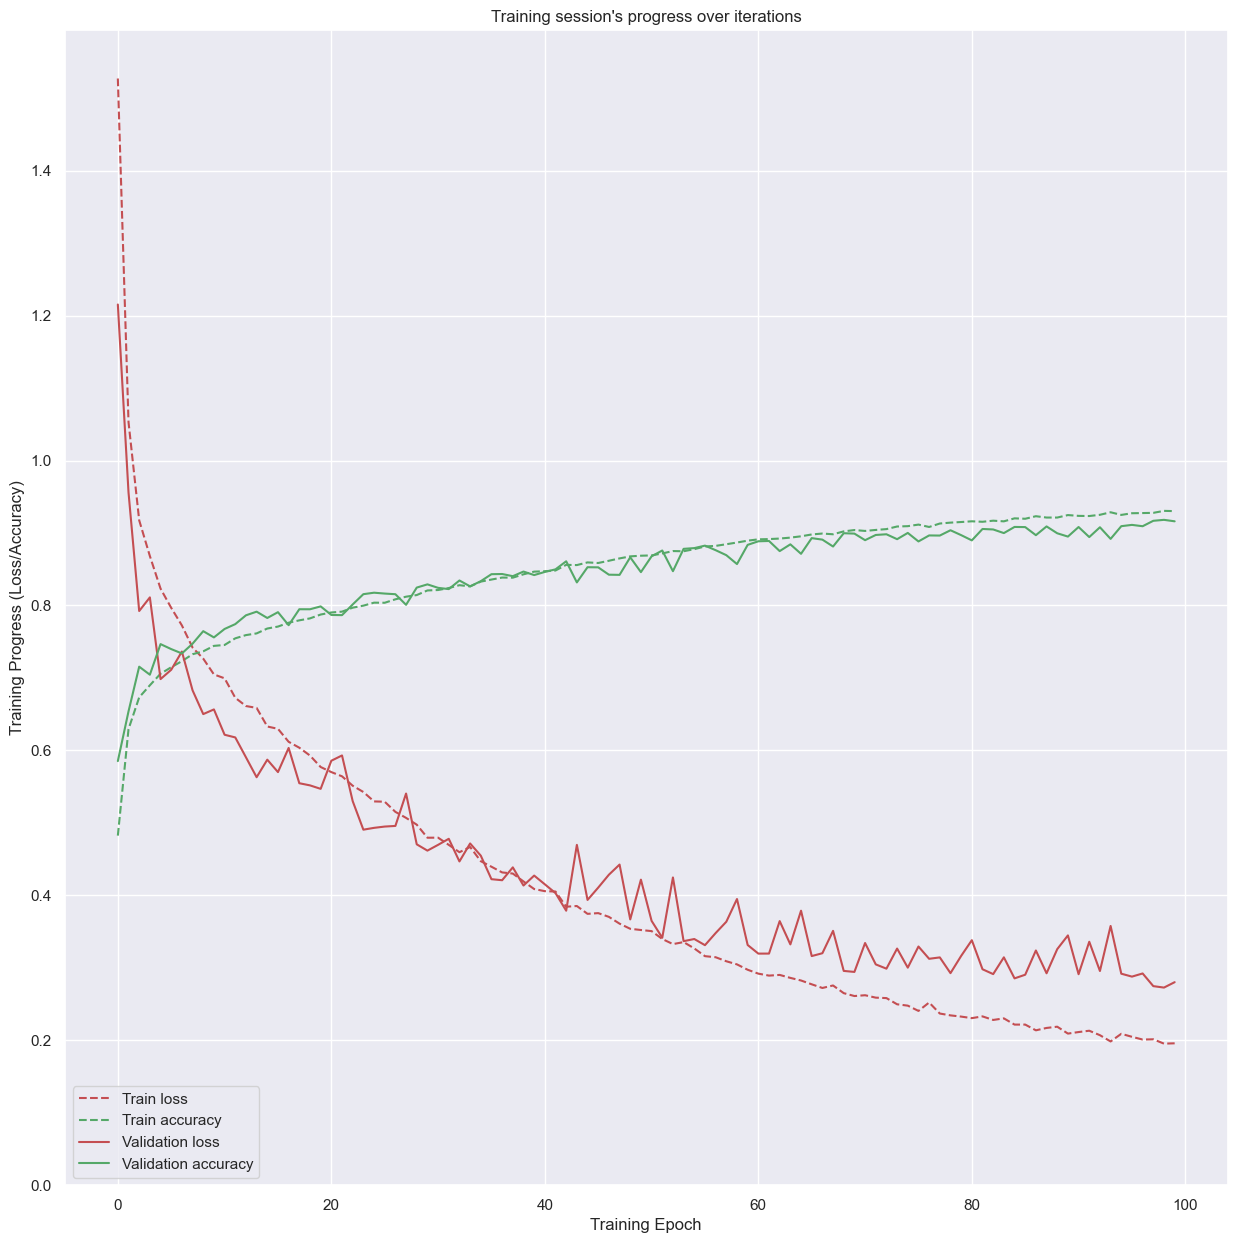

In [43]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

1755/1755 [==============================] - 123s 70ms/step


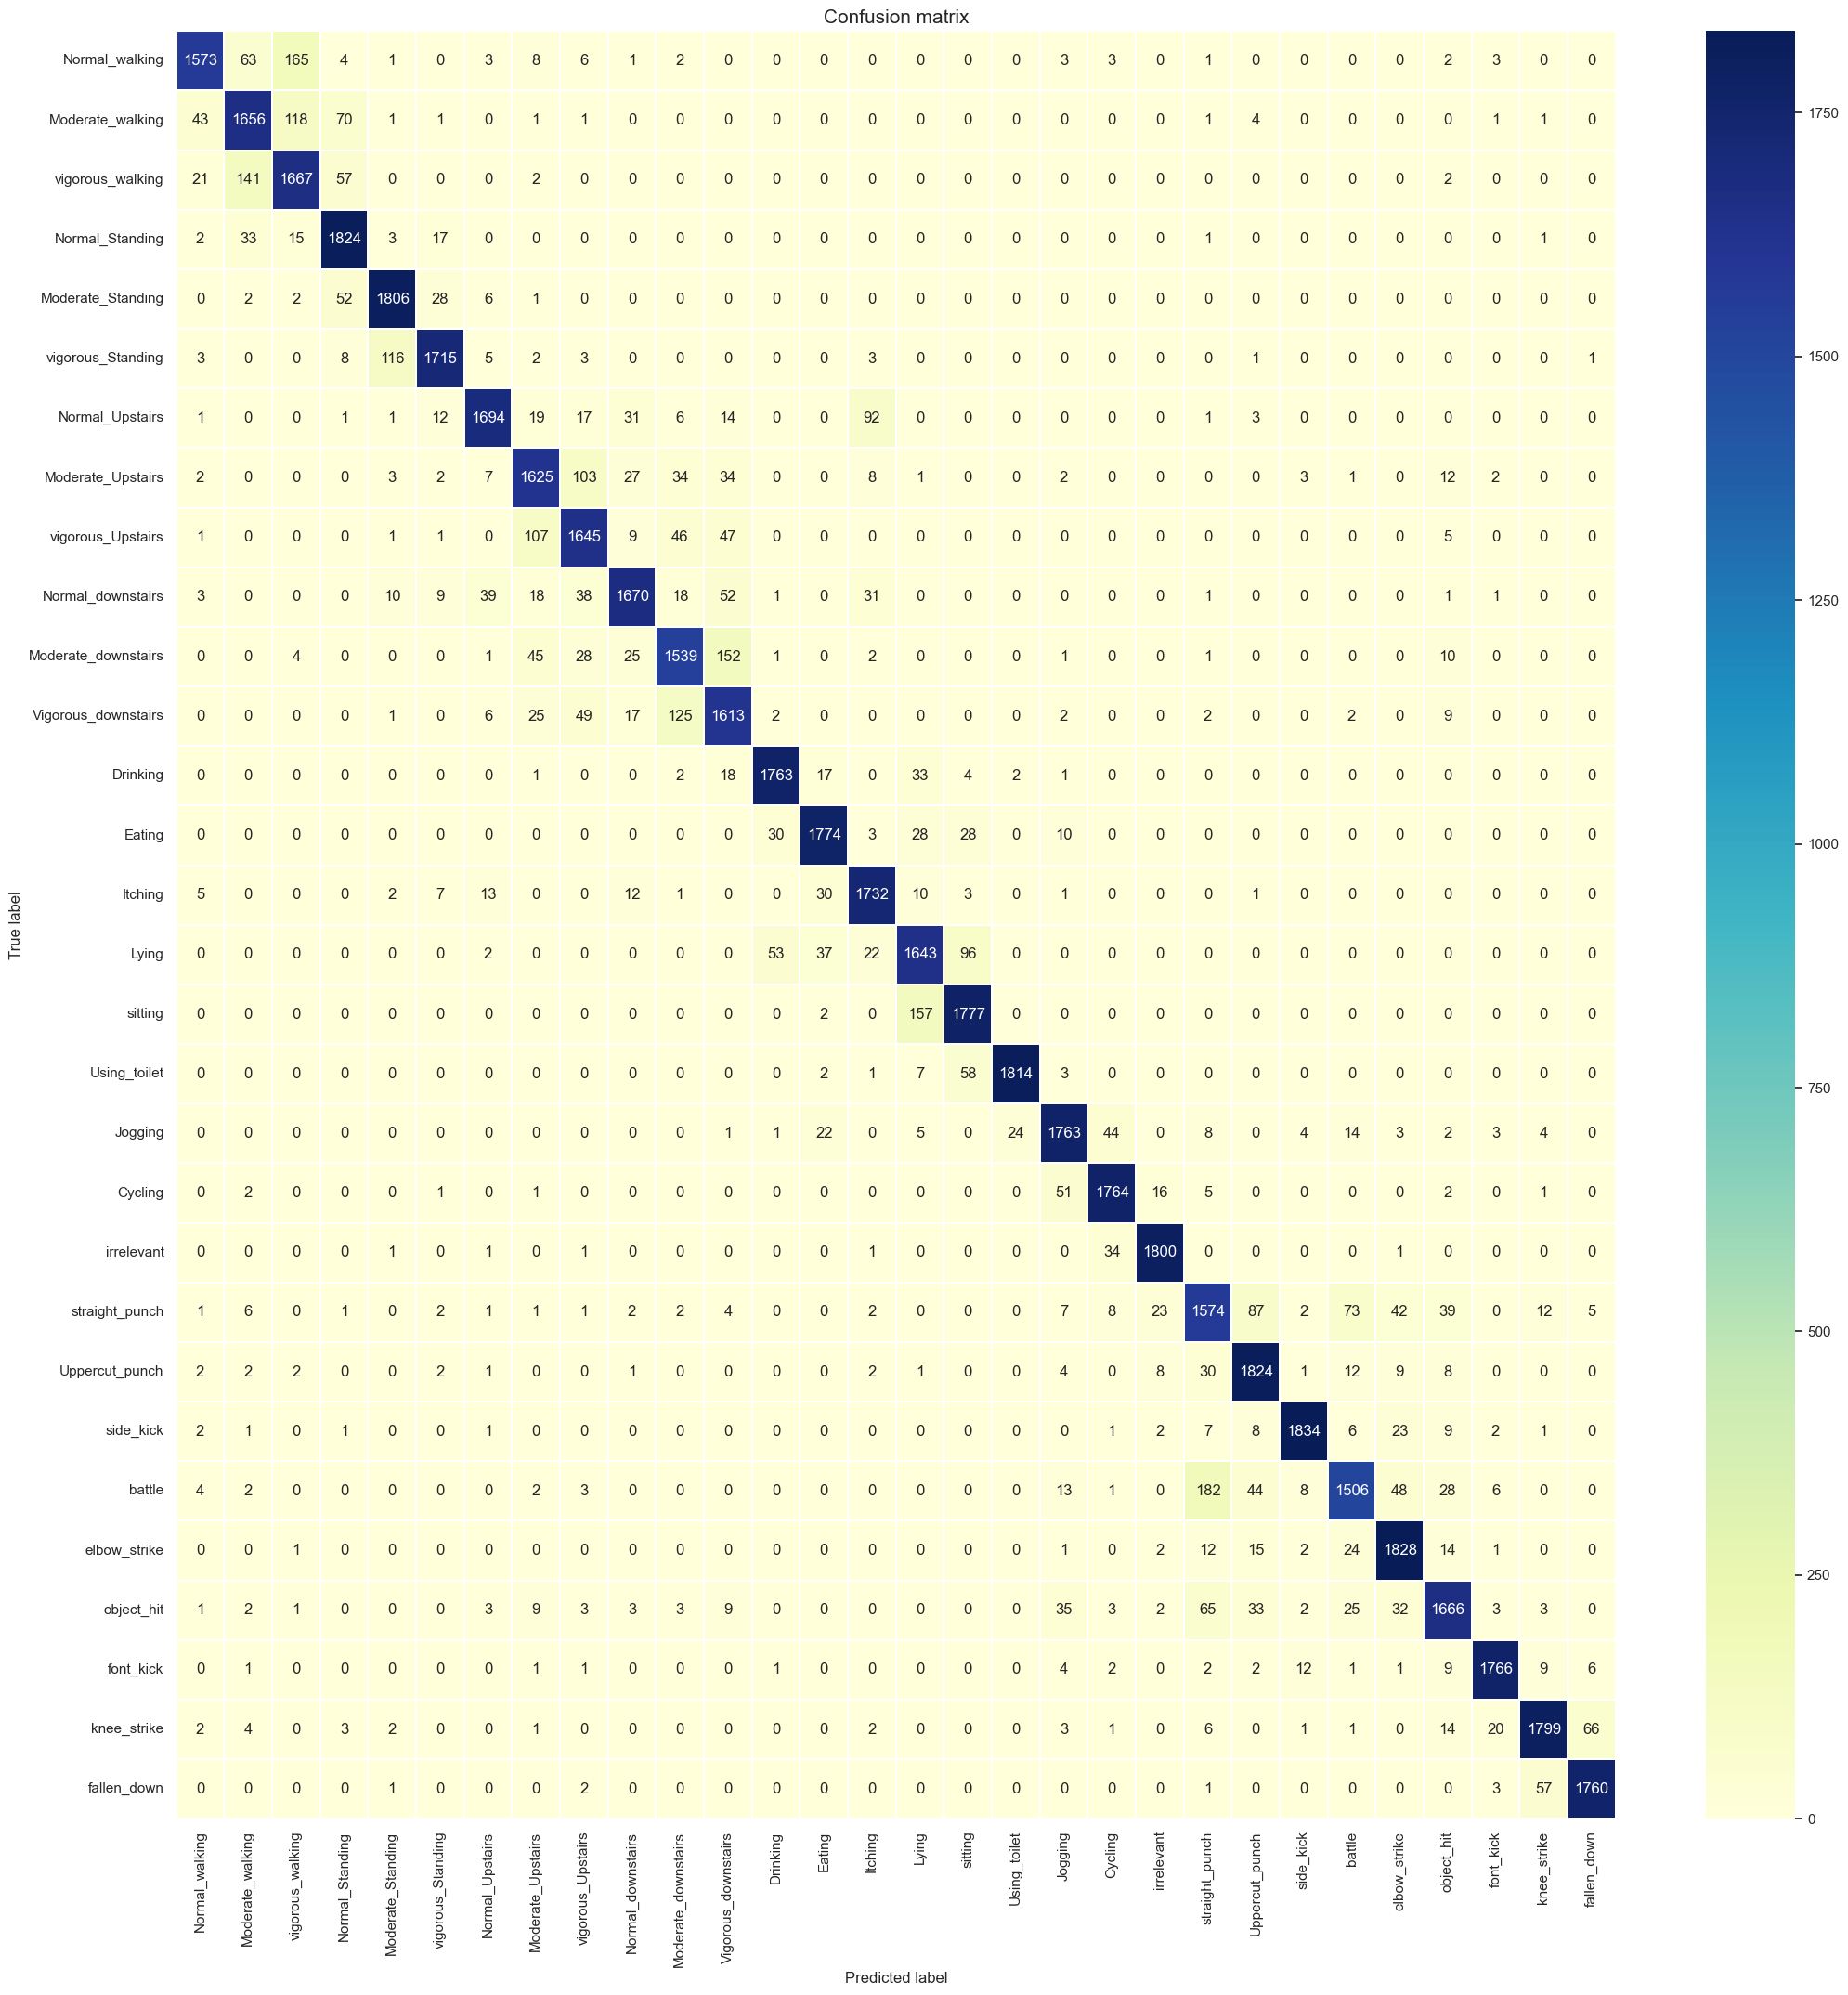

In [44]:
predictions = classifier.predict(X_test)
class_labels = ["Normal_walking",'Moderate_walking','vigorous_walking',
                'Normal_Standing','Moderate_Standing','vigorous_Standing',
                'Normal_Upstairs','Moderate_Upstairs','vigorous_Upstairs',
                'Normal_downstairs','Moderate_downstairs','Vigorous_downstairs',
                'Drinking','Eating','Itching',"Lying","sitting",
                "Using_toilet","Jogging","Cycling","irrelevant","straight_punch",
               "Uppercut_punch","side_kick","battle","elbow_strike","object_hit","font_kick","knee_strike","fallen_down"]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion.png')
plt.show()

1755/1755 [==============================] - 120s 68ms/step


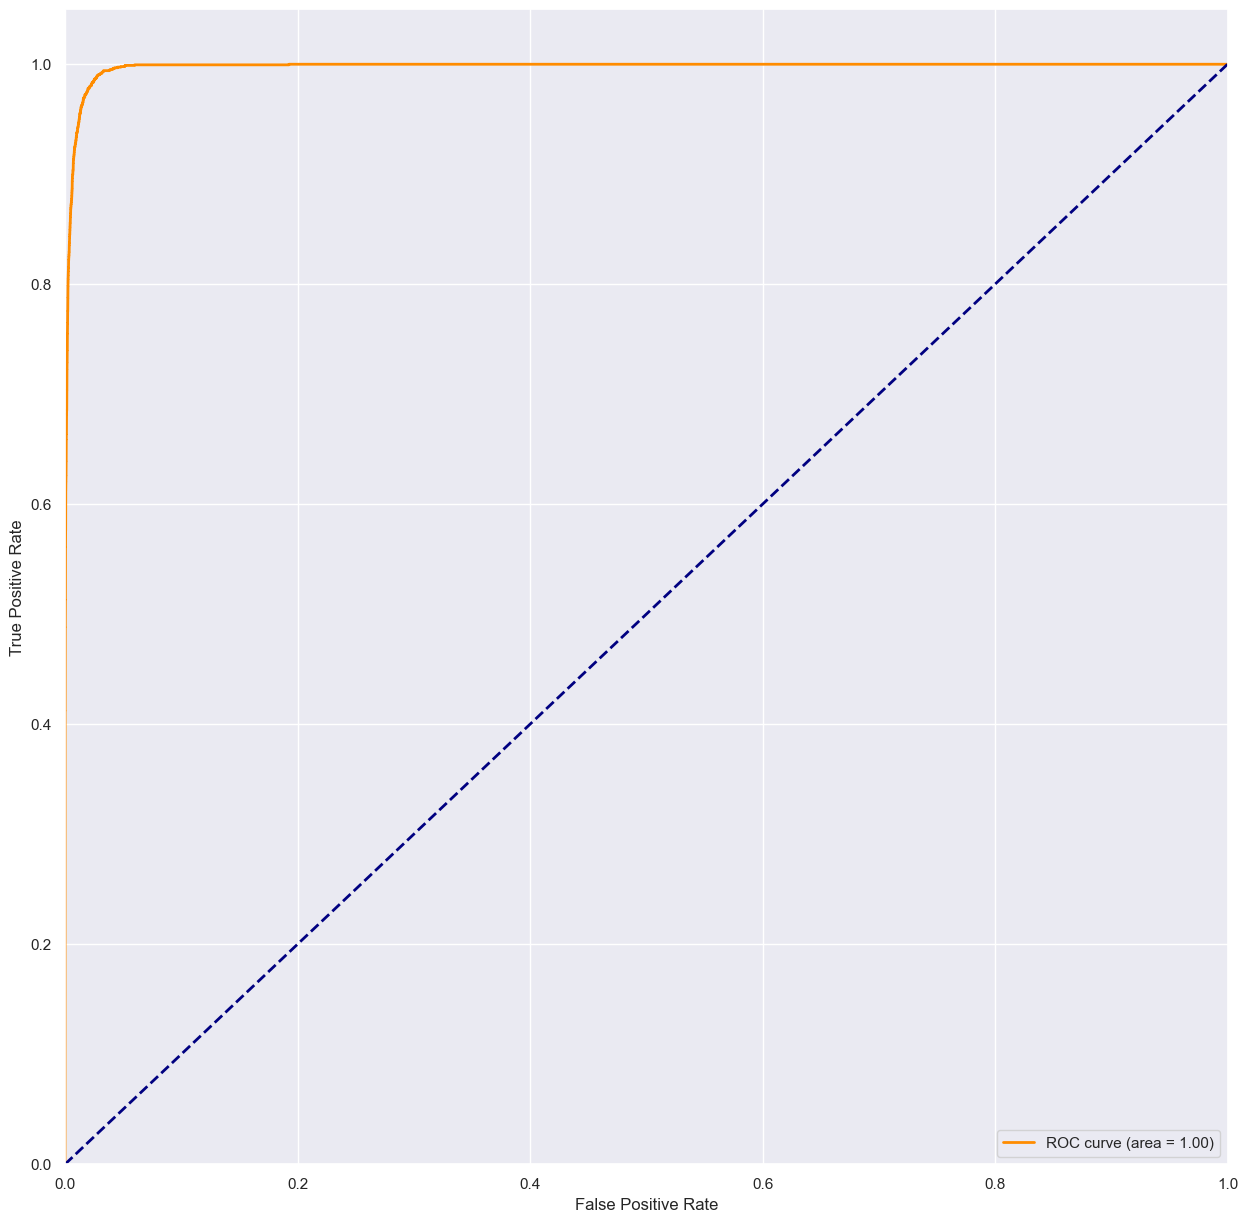

In [45]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 30 # number of class

y_pred = classifier.predict(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [46]:
classifier.save("modelall9503.h5")